In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, t, ttest_1samp, pearsonr, f
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('../Data_Preproc_NoEncoding.csv')
dataset.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [3]:
labels = pd.read_csv('../Labels.csv')
labels.head()

,class
0,p
1,p
2,p
3,p
4,p


In [4]:
df = pd.concat([labels, dataset], axis=1)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [5]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,5.44,y,f,f,d,u


In [6]:
sample_poisonous = df[df['class'] == 'p']['class']
sample_edible = df[df['class'] == 'e']['class']
cap_diameter = df['cap-diameter'].sample(n=6000, random_state=1)
np_cap_diameter = np.array(cap_diameter)
stem_height = df['stem-height'].sample(n=6000, random_state=1)
np_stem_height = np.array(stem_height)
stem_width = df['stem-width'].sample(n=6000, random_state=1)
np_stem_width = np.array(stem_width)

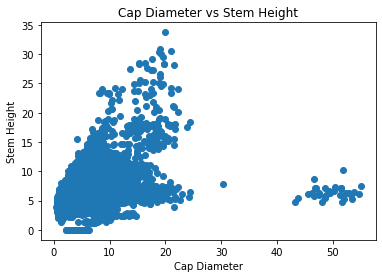

In [7]:
# Scatter plot of cap-diameter vs stem-height
plt.scatter(np_cap_diameter, np_stem_height)
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Height')
plt.title('Cap Diameter vs Stem Height')
plt.show()

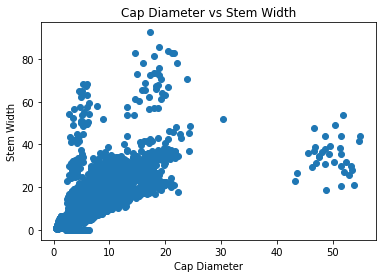

In [8]:
# Scatter plot of cap-diameter vs stem-width
plt.scatter(np_cap_diameter, np_stem_width)
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Width')
plt.title('Cap Diameter vs Stem Width')
plt.show()

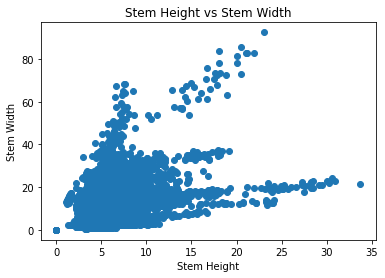

In [9]:
# Scatter plot of stem-height vs stem-width
plt.scatter(np_stem_height, np_stem_width)
plt.xlabel('Stem Height')
plt.ylabel('Stem Width')
plt.title('Stem Height vs Stem Width')
plt.show()

In [73]:
def cal_r(x, y):
    n = len(x)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    x_std = np.std(x, ddof=1)
    y_std = np.std(y, ddof=1)
    r = np.sum((x - x_bar)*(y - y_bar)) / ((np.sum((x - x_bar)**2) * (np.sum((y - y_bar)**2))))**0.5
    return r

def f_stat(F, r):
    ans = (F-1)/((F+1)**2 - 4*(r**2)*F)**0.5
    return ans

In [78]:
# T test for correlation coefficient between cap-diameter, stem-height, and stem-width with the class
# Null hypothesis: There no of correlation between the features of poisonous mushrooms ie r = 0
# Alternative hypothesis: There is correlation between the features of poisonous mushrooms ie r!=0

F = np.var(np_cap_diameter, ddof=1) / np.var(np_stem_height,ddof=1)
dfn = np_cap_diameter.size-1
dfd = np_stem_height.size-1
alpha = 0.05
correlation_coefficient = cal_r(np_cap_diameter, np_stem_height)
f_stat_val = f_stat(F, correlation_coefficient)
print('F-statistic for cap-diameter and stem-height: ', f_stat_val)
f_critical_val = f.ppf(1-alpha/2, dfn, dfd)
print("F-critical value for cap-diameter and stem-height: ", f_critical_val)
if f_stat_val > f_critical_val:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


P-value for cap-diameter and stem-height:  1.1102230246251565e-16
F= 2.1846045541546135
Reject the null hypothesis.
Correlation coefficient between cap-diameter and stem-height:  0.43817338254000415
F-statistic for cap-diameter and stem-height:  0.4071800146085122
1.0519179114066117


In [64]:
F = np.var(np_stem_width, ddof=1) / np.var(np_stem_height,ddof=1)
dfn = np_stem_width.size-1
dfd = np_stem_height.size-1
correlation_coefficient = cal_r(np_stem_width, np_stem_height)  
f_stat_val = f_stat(F, correlation_coefficient)
print('F-statistic for stem-width and stem-height: ', f_stat_val)
f_critical_val = f.ppf(1-alpha/2, dfn, dfd)
print("F-critical value for stem-width and stem-height: ", f_critical_val)
if f_stat_val > f_critical_val:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

P-value for stem-width and stem-height:  1.1102230246251565e-16
F= 8.868563230834855
Reject the null hypothesis.


In [ ]:
F = np.var(np_cap_diameter, ddof=1) / np.var(np_stem_width,ddof=1)
dfn = np_cap_diameter.size-1
dfd = np_stem_width.size-1
correlation_coefficient = cal_r(np_cap_diameter, np_stem_width)
f_stat_val = f_stat(F, correlation_coefficient)
print('F-statistic for cap-diameter and stem-width: ', f_stat_val)
f_critical_val = f.ppf(1-alpha/2, dfn, dfd)
print("F-critical value for cap-diameter and stem-width: ", f_critical_val)
if f_stat_val > f_critical_val:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

P-value for cap-diameter and stem-height:  1.0
F= 0.2752033755858261
Fail to reject the null hypothesis.


In [2]:
!git add .
!git commit -m "f-test correlation"
!git push

Merge made by the 'ort' strategy.
 EDA1.ipynb                                         |    2 +-
 EDA2.ipynb                                         |    2 +-
 Hypothesis-Testing/Chi-Squared_Test.ipynb          |    3 +-
 Hypothesis-Testing/Colors-Z-Test-Proportions.ipynb | 1609 ++++++++++++++++++++
 Hypothesis-Testing/Intersection_H_Tests.ipynb      | 1241 +++++++++++++++
 5 files changed, 2853 insertions(+), 4 deletions(-)
 create mode 100644 Hypothesis-Testing/Colors-Z-Test-Proportions.ipynb
 create mode 100644 Hypothesis-Testing/Intersection_H_Tests.ipynb


From https://github.com/arnav10goel/CSE558-DSc-Project
   6acf237..60fd244  main       -> origin/main
